In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
header = ["regression_name", "dataset", "poisoning_threshold", "dataset_size", "num_lookups", "mean", "median", "log_error", "d_log_error", "mse_error", "build_time"]
legitimate_df = pd.read_csv("../data/benchmark_legitimate.csv", delimiter = ";", names = header)
poisoned_df = pd.read_csv("../data/benchmark_poisoned.csv", delimiter = ";", names = header)

In [64]:
legitimate_df.head()

,regression_name,dataset,poisoning_threshold,dataset_size,num_lookups,mean,median,log_error,d_log_error,mse_error,build_time
0,SLR,poisoning,0.01,20000,1000000,51.2802,51.2663,121558,129683,180892146,43718
1,LogTE,poisoning,0.01,20000,1000000,50.6876,50.6842,111149,119466,693467587,10957223
2,DLogTE,poisoning,0.01,20000,1000000,50.5854,50.5759,111023,119221,699208952,3517011
3,2P,poisoning,0.01,20000,1000000,49.4749,49.4684,113798,122509,1107349751,112576327
4,TheilSen,poisoning,0.01,20000,1000000,50.5622,50.5566,121455,129822,182894349,6313610


In [65]:
datasets = ["poisoning"]
regressions = ["SLR", "LogTE", "DLogTE", "2P", "TheilSen", "ALEX", "PGM_2", "PGM_4", "PGM_8", "PGM_16", "PGM_32", "PGM_64"]
#regressions = ["SLR", "LogTE", "DLogTE", "2P", "TheilSen", "LAD", "ALEX", "PGM_2", "PGM_4", "PGM_8", "PGM_16", "PGM_32", "PGM_64"]
poisoning_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]

## Median lookup time

In [66]:
median_lookup_time_impact = {}

for dataset in datasets:

    median_lookup_time_impact_per_regression = {}

    for regression in regressions:

        median_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['median']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['median']
            median_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        median_lookup_time_impact_per_regression[regression] = median_lookup_time_impact_per_poisoning_threshold

    median_lookup_time_impact[dataset] = median_lookup_time_impact_per_regression

## Mean lookup time

In [67]:
mean_lookup_time_impact = {}

for dataset in datasets:

    mean_lookup_time_impact_per_regression = {}

    for regression in regressions:

        mean_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            mean_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        mean_lookup_time_impact_per_regression[regression] = mean_lookup_time_impact_per_poisoning_threshold

    mean_lookup_time_impact[dataset] = mean_lookup_time_impact_per_regression

In [68]:
mean_lookup_time_overall_legit = {}
mean_lookup_time_overall_poisoned = {}

for dataset in datasets:

    mean_lookup_time_per_regression_legit = {}
    mean_lookup_time_per_regression_poisoned = {}

    for regression in regressions:

        mean_lookup_per_poisoning_threshold_legit = []
        mean_lookup_per_poisoning_threshold_poisoned = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            mean_lookup_per_poisoning_threshold_legit.append(lookup_time_legit.item())
            mean_lookup_per_poisoning_threshold_poisoned.append(lookup_time_poisoned.item())

        mean_lookup_time_per_regression_legit[regression] = np.mean(mean_lookup_per_poisoning_threshold_legit)
        mean_lookup_time_per_regression_poisoned[regression] = np.mean(mean_lookup_per_poisoning_threshold_poisoned)

    mean_lookup_time_overall_legit[dataset] = mean_lookup_time_per_regression_legit
    mean_lookup_time_overall_poisoned[dataset] = mean_lookup_time_per_regression_poisoned

In [69]:
lookup_time_legit

239    64.767
Name: mean, dtype: float64

## Impact on median lookup time

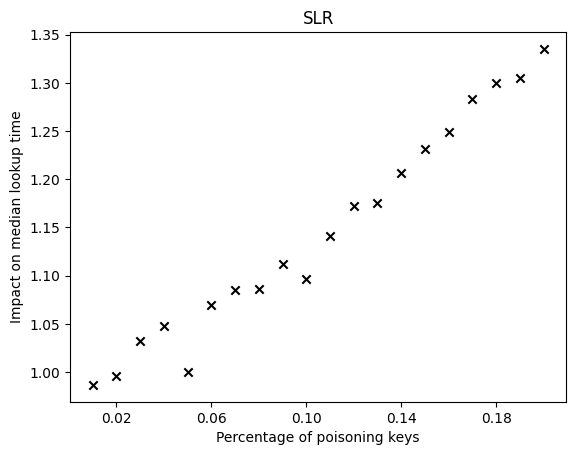

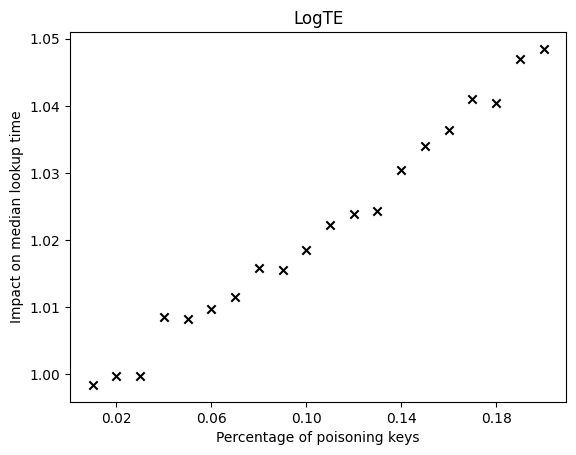

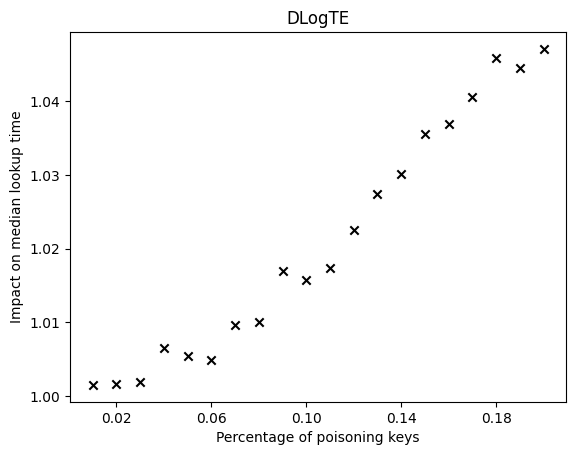

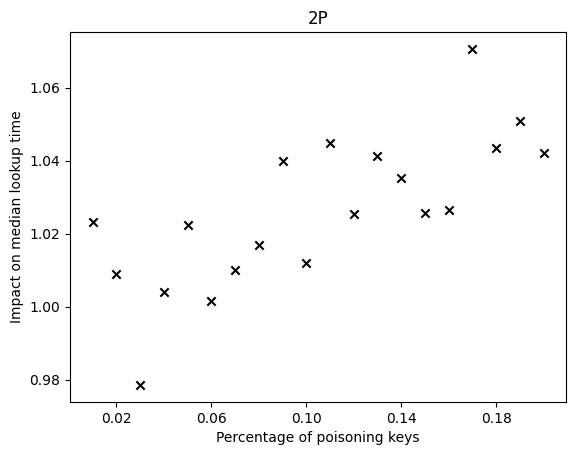

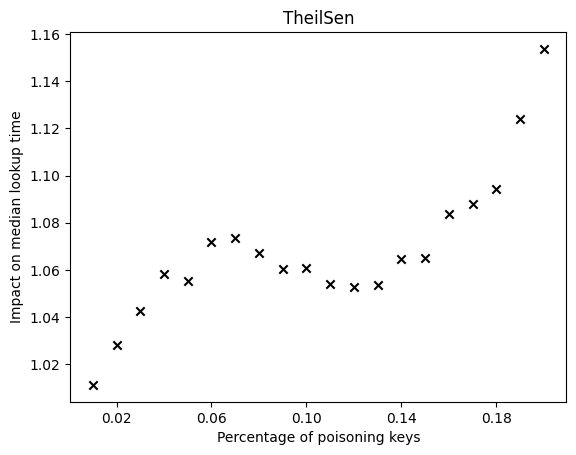

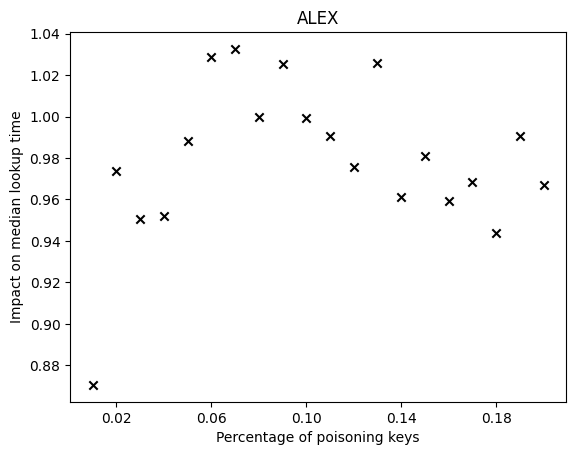

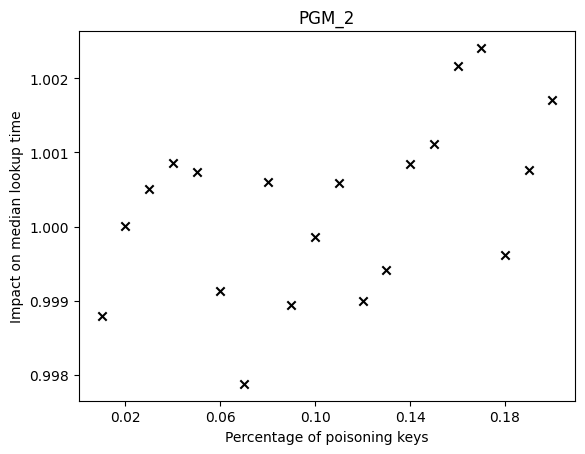

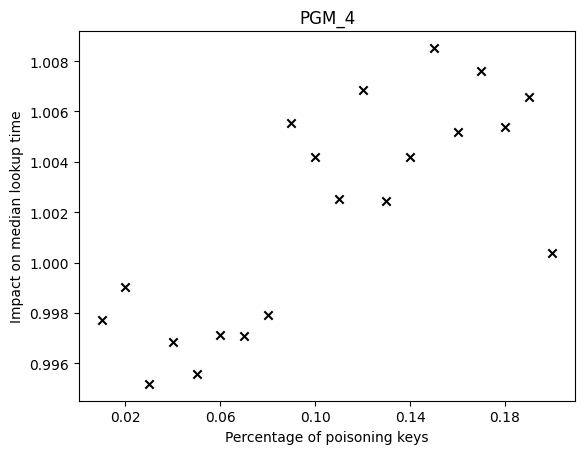

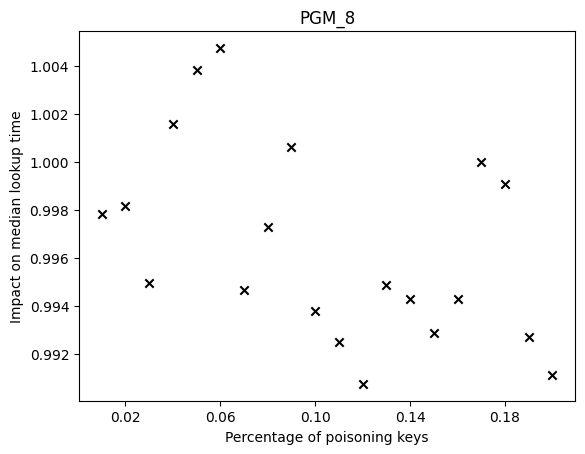

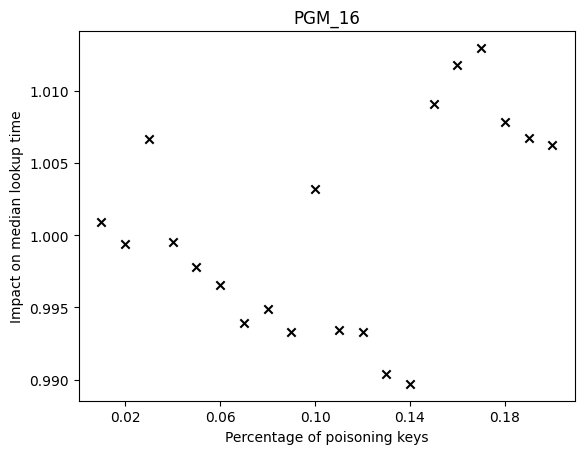

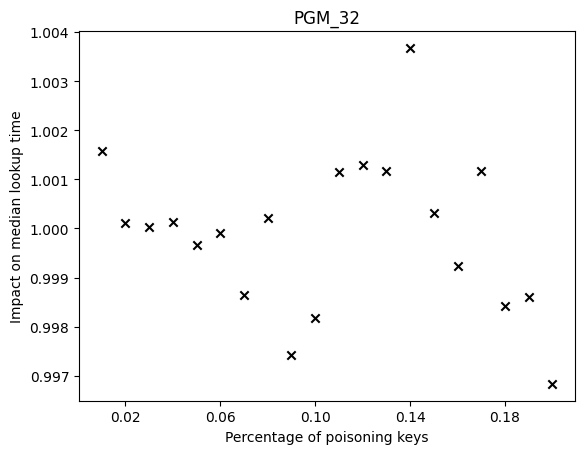

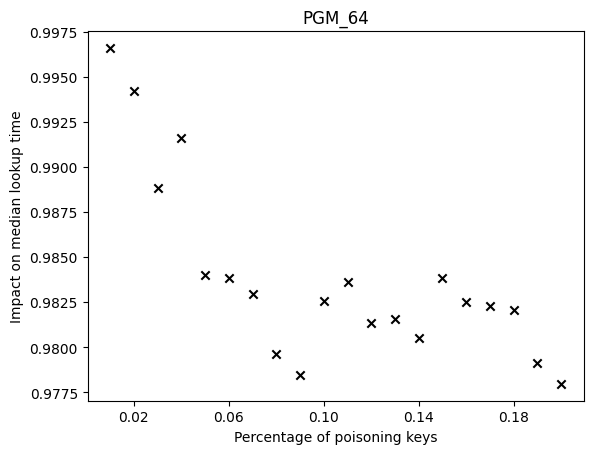

In [70]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, median_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        plt.title(regression)
        plt.xlabel('Percentage of poisoning keys')
        plt.ylabel('Impact on median lookup time')
        plt.show()

## Impact on mean lookup time

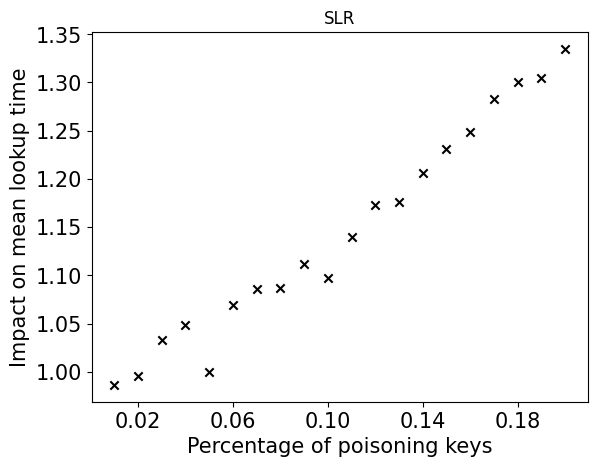

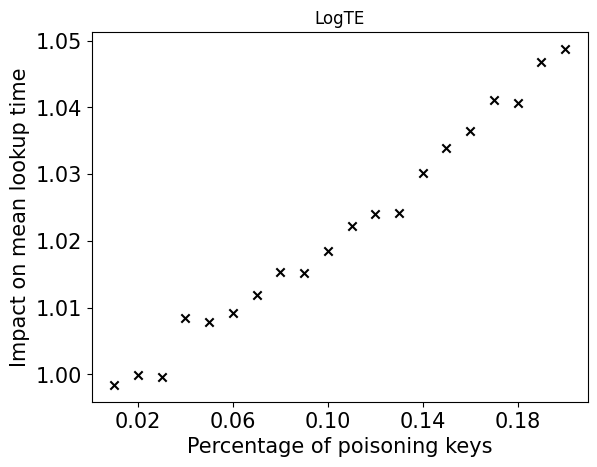

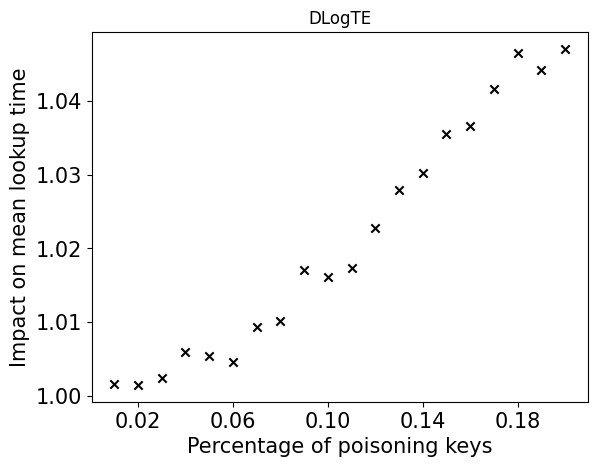

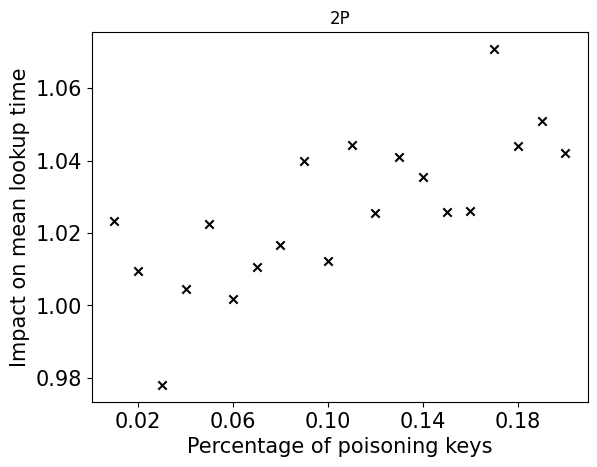

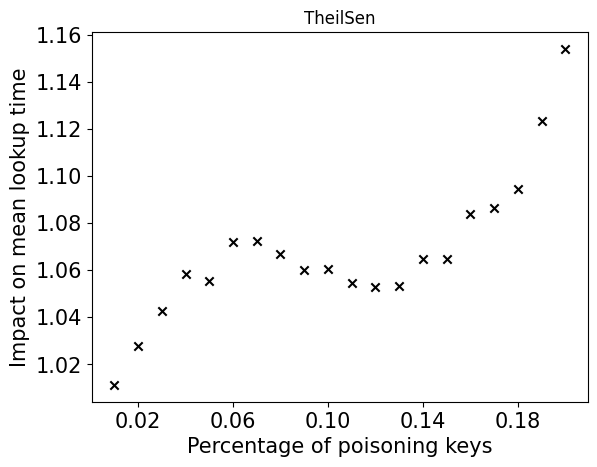

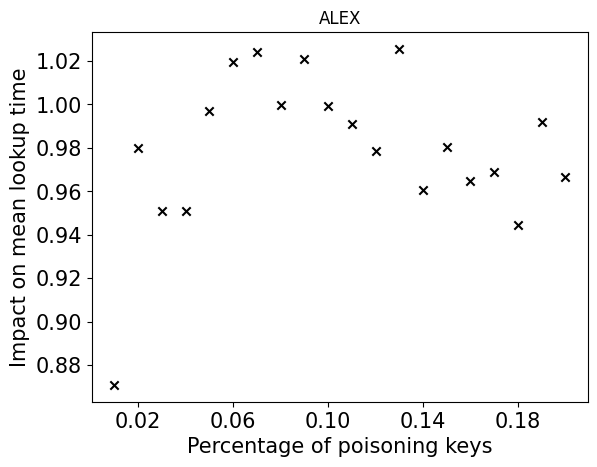

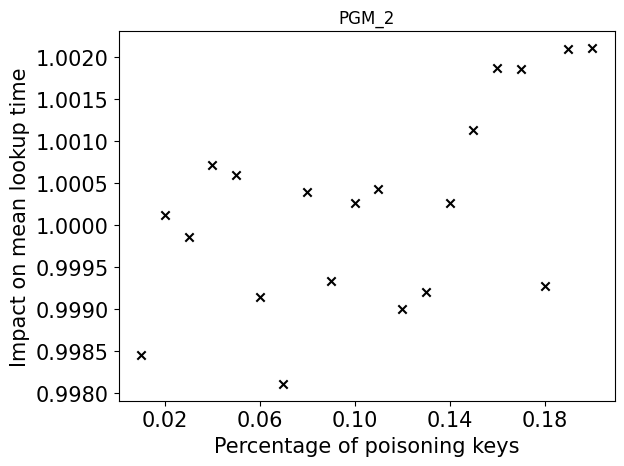

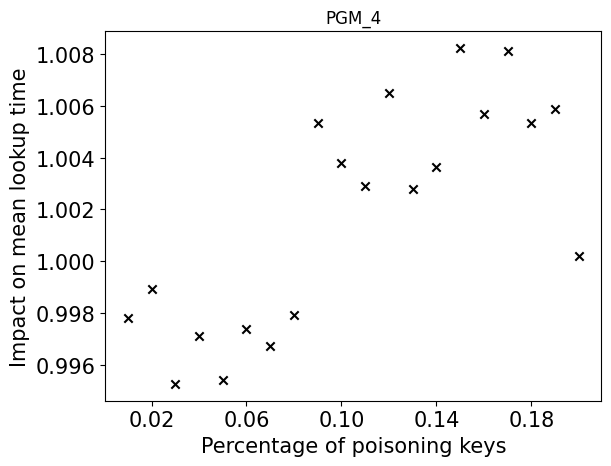

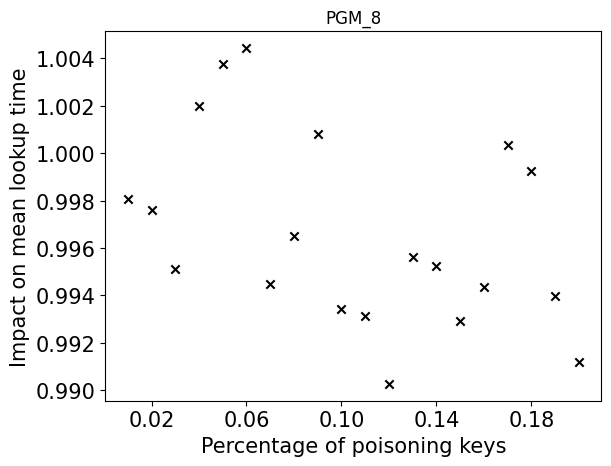

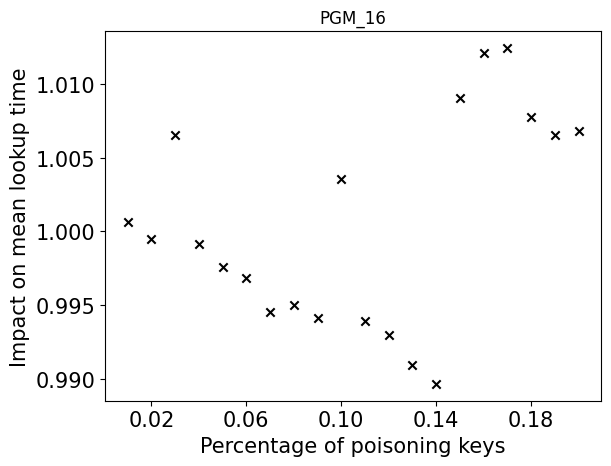

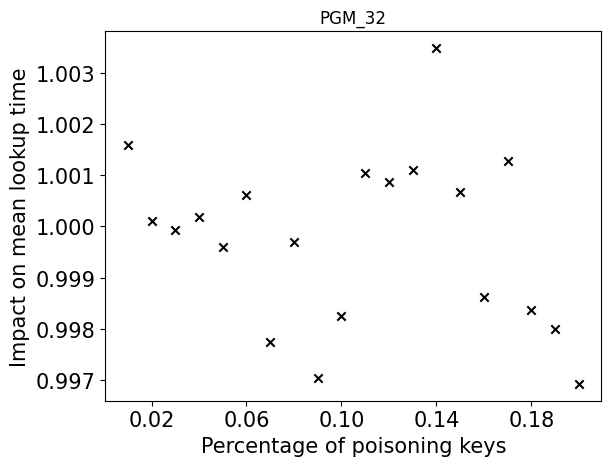

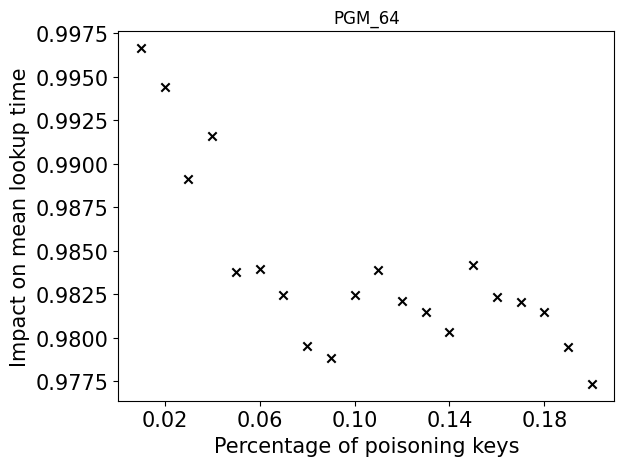

In [71]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, mean_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        plt.title(regression)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('Percentage of poisoning keys', fontsize=15)
        plt.ylabel('Impact on mean lookup time', fontsize = 15)
        plt.show()

In [72]:
mean_lookup_time_overall_legit['poisoning'].values()

dict_values([51.328615, 50.70294, 50.70994, 50.72362499999999, 50.52867, 21.74546, 55.881190000000004, 58.34444, 49.329350000000005, 55.29912499999999, 62.313955, 64.77018])

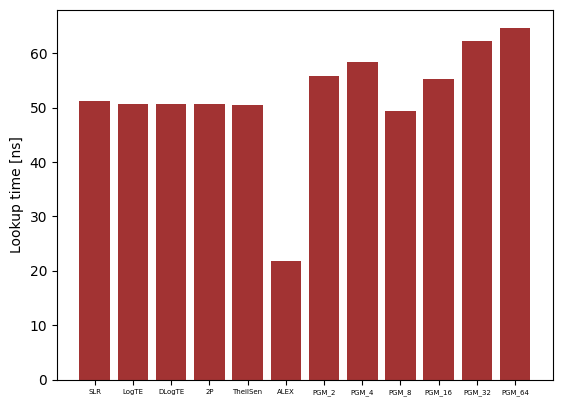

In [73]:
y_pos = np.arange(len(regressions))

plt.bar(y_pos, mean_lookup_time_overall_legit['poisoning'].values(), align='center', alpha=0.8, color="darkred")
plt.xticks(y_pos, regressions, fontsize=5)
plt.ylabel('Lookup time [ns]')
#plt.title('Median lookup time of learned indexes averaged across all poisoning thresholds (non-poisoned)')
plt.show()

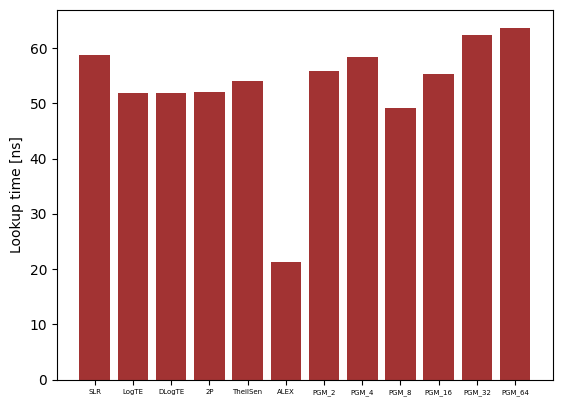

In [74]:
y_pos = np.arange(len(regressions))

plt.bar(y_pos, mean_lookup_time_overall_poisoned['poisoning'].values(), align='center', alpha=0.8, color="darkred")
plt.xticks(y_pos, regressions, fontsize=5)
plt.ylabel('Lookup time [ns]')
#plt.title('Mean lookup time of learned indexes averaged across all poisoning thresholds (poisoned)')
plt.show()